# HCA Final recruitment stats after withdrawals and exclusions


In [1]:
# check out  ~/cron/aabc_recruits.sh
#

In [2]:
#load some libraries
import pandas as pd
import seaborn as sns
from ccf.box import LifespanBox
import yaml
from functions import *
from config import *
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [3]:
print(date.today().strftime("%m/%d/%Y"))

05/11/2023


In [4]:
#load HCA inventory 
config = LoadSettings()
secret=pd.read_csv(config['config_files']['secrets'])
box = LifespanBox(cache="./tmp")
pathp=box.downloadFile(config['hcainventory'])
ids=pd.read_csv(pathp)

In [8]:
##subset to v1 for recruitment stats
forplot=ids[['subject','redcap_event','event_age','site','M/F','race','ethnic_group','pedid','IntraDB']].loc[ids.redcap_event.isin(['V1','V2'])].sort_values('redcap_event')
pd.crosstab(forplot.IntraDB,forplot.redcap_event,margins=True)
#.drop_duplicates(subset='subject',keep='first')


redcap_event,V1,V2,All
IntraDB,,,
Behavioral Only,0,12,12
CCF_HCA_STG,1199,599,1798
CCF_PCMP_ITK,17,0,17
All,1216,611,1827


In [9]:
forplot=forplot.drop_duplicates(subset='subject',keep='first')


### HCA Counts from 1216 with V1 imaging

In [10]:
##ages
bins= [30,40,50,60,70,80,90,120]
forplot['ages']=pd.to_numeric(forplot.event_age)
forplot['AgeGroup'] = pd.cut(forplot['ages'], bins=bins,right=False)# labels=labels,
S5=pd.get_dummies(forplot.AgeGroup, prefix='age')

#forplot.columns
forplot['Race']=forplot.race.replace({'American Indian/Alaska Native':'Nat Amer/Alaskan','Black or African American':'Black','Hawaiian or Pacific Islander':'Nat Hawaiian/PI','More than one race':'More than one','Unknown or not reported':'Unknown'})

#thnicity
forplot['Ethnicity']=forplot.ethnic_group
forplot['Ethnicity']=forplot.ethnic_group.replace({'Hispanic or Latino':'Hispanic','Not Hispanic or Latino':'Non-Hispanic','unknown or not reported':'Unknown'})

forplot['Site']=forplot.site

forplot['Sex']=forplot['M/F'].replace({'M':'Male','F':'Female'})

Site,MGH,UCLA,UMinn,WashU
Race,,,,
Asian,19,39,15,4
Black,47,32,26,62
More than one,9,23,7,7
Nat Amer/Alaskan,0,0,2,1
Nat Hawaiian/PI,0,2,1,0
Unknown,4,13,5,1
White,214,189,251,243


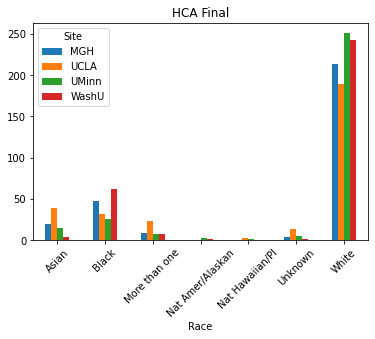

In [7]:

#print("                       HCA")
pd.crosstab(forplot.Race,forplot.Site).plot.bar(rot=45,title='HCA Final')
pd.crosstab(forplot.Race,forplot.Site)


Site,MGH,UCLA,UMinn,WashU
Ethnicity,,,,
Hispanic,30,87,13,9
Non-Hispanic,262,211,293,309
Unknown,1,0,1,0


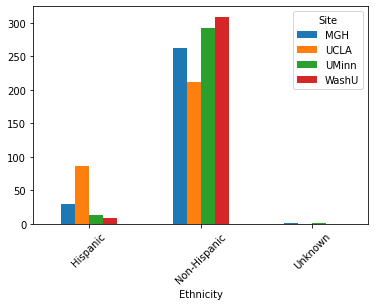

In [8]:
pd.crosstab(forplot.Ethnicity,forplot.Site).plot.bar(rot=45)
pd.crosstab(forplot.Ethnicity,forplot.Site)

Site,MGH,UCLA,UMinn,WashU
AgeGroup,,,,
"[30, 40)",22,30,23,29
"[40, 50)",54,71,52,57
"[50, 60)",59,63,56,56
"[60, 70)",48,49,60,53
"[70, 80)",46,40,49,49
"[80, 90)",52,38,52,52
"[90, 120)",12,7,15,11


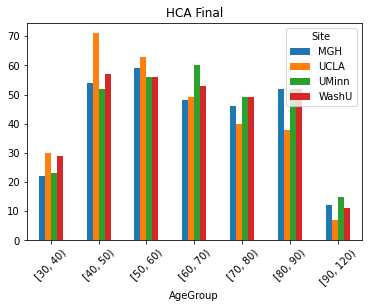

In [9]:
pd.crosstab(forplot.AgeGroup,forplot.Site).plot.bar(rot=45,title='HCA Final')
pd.crosstab(forplot.AgeGroup,forplot.Site)

Site,MGH,UCLA,UMinn,WashU
Sex,,,,
Female,163,174,177,177
Male,130,124,130,141


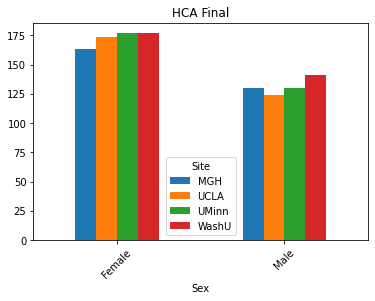

In [10]:
pd.crosstab(forplot.Sex,forplot.Site).plot.bar(rot=45,title='HCA Final')
pd.crosstab(forplot.Sex,forplot.Site)

Race,Asian,Black,More than one,Nat Amer/Alaskan,Nat Hawaiian/PI,Unknown,White
AgeGroup,,,,,,,
"[30, 40)",12,19,11,0,0,5,57
"[40, 50)",24,53,16,0,1,9,131
"[50, 60)",17,41,11,1,1,7,156
"[60, 70)",15,26,4,1,1,1,162
"[70, 80)",7,14,2,0,0,0,161
"[80, 90)",1,9,2,1,0,1,180
"[90, 120)",0,1,0,0,0,0,44


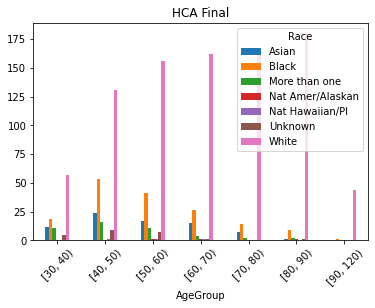

In [11]:
pd.crosstab(forplot.AgeGroup,forplot.Race).plot.bar(rot=45,title='HCA Final')
pd.crosstab(forplot.AgeGroup,forplot.Race)

Ethnicity,Hispanic,Non-Hispanic,Unknown
AgeGroup,,,
"[30, 40)",25,79,0
"[40, 50)",39,195,0
"[50, 60)",39,195,0
"[60, 70)",15,195,0
"[70, 80)",16,167,1
"[80, 90)",4,189,1
"[90, 120)",0,45,0


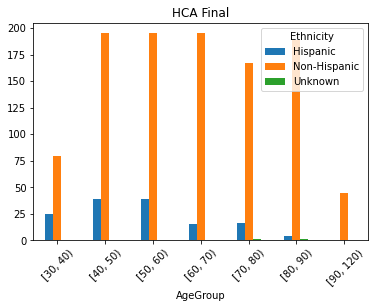

In [12]:
pd.crosstab(forplot.AgeGroup,forplot.Ethnicity).plot.bar(rot=45,title='HCA Final')
pd.crosstab(forplot.AgeGroup,forplot.Ethnicity)

Sex,Female,Male
AgeGroup,,
"[30, 40)",55,49
"[40, 50)",140,94
"[50, 60)",142,92
"[60, 70)",121,89
"[70, 80)",92,92
"[80, 90)",106,88
"[90, 120)",28,17


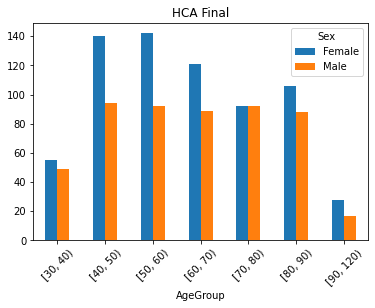

In [13]:
pd.crosstab(forplot.AgeGroup,forplot.Sex).plot.bar(rot=45,title='HCA Final')
pd.crosstab(forplot.AgeGroup,forplot.Sex)

Sex,Female,Male
Race,,
Asian,37,40
Black,107,60
More than one,26,20
Nat Amer/Alaskan,2,1
Nat Hawaiian/PI,3,0
Unknown,18,5
White,498,399


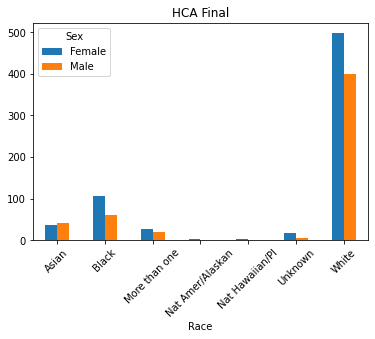

In [14]:
pd.crosstab(forplot.Race,forplot.Sex).plot.bar(rot=45,title='HCA Final')
pd.crosstab(forplot.Race,forplot.Sex)

Sex,Female,Male
Ethnicity,,
Hispanic,86,53
Non-Hispanic,603,472
Unknown,2,0


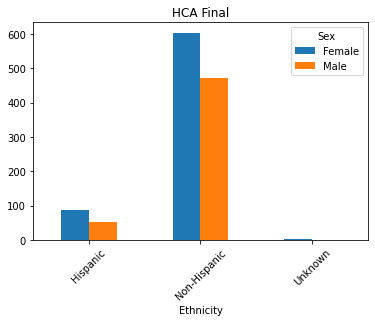

In [15]:
pd.crosstab(forplot.Ethnicity,forplot.Sex).plot.bar(rot=45,title='HCA Final')
pd.crosstab(forplot.Ethnicity,forplot.Sex)